# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - Primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("/content/CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

CARREGAR A BASE DE DADOS


In [189]:
# Carregar a base de dados
df = pd.read_csv("/content/CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


**VERIFICAÇÃO  DOS TIPOS DE DADOS**

In [190]:
print(df.dtypes)

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object


APLICAR A TRANSFORMAÇÃO NOS TIPOS DE DADOS


In [191]:
df['customerID'] = df['customerID'].astype(str)
df['Genero'] = df['Genero'].astype('category')
df['Idoso'] = df['Idoso'].astype(int)
df['Casado'] = df['Casado'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['Tempo_como_Cliente'] = df['Tempo_como_Cliente'].astype(int)
df['PhoneService'] = df['PhoneService'].astype('category')
df['Servico_Internet'] = df['Servico_Internet'].str.upper().astype('category')
df['Servico_Seguranca'] = df['Servico_Seguranca'].astype('category')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['Tipo_Contrato'] = df['Tipo_Contrato'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
df['Pagamento_Mensal'] = pd.to_numeric(df['Pagamento_Mensal'], errors='coerce')
df['Total_Pago'] = pd.to_numeric(df['Total_Pago'], errors='coerce')
df['Churn'] = df['Churn'].astype('category')

In [192]:
print(df.head())

   customerID  Genero  Idoso Casado Dependents  Tempo_como_Cliente  \
0  7590-VHVEG  Female      0    Yes         No                   1   
1  5575-GNVDE    Male      0     No         No                  34   
2  3668-QPYBK    Male      0     No         No                   2   
3  7795-CFOCW    Male      0     No         No                  45   
4  9237-HQITU     NaN      0     No         No                   2   

  PhoneService Servico_Internet Servico_Seguranca Suporte_Tecnico StreamingTV  \
0           No              DSL                No              No          No   
1          Yes              DSL               Yes              No          No   
2          Yes              DSL               Yes              No          No   
3           No              DSL               Yes             Yes          No   
4          Yes      FIBER OPTIC                No              No          No   

    Tipo_Contrato              PaymentMethod  Pagamento_Mensal  Total_Pago  \
0  Month-to-mo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [193]:
# Verifica se tem colunas com dados faltantes
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerID          2500 non-null   object  
 1   Genero              2488 non-null   category
 2   Idoso               2500 non-null   int64   
 3   Casado              2500 non-null   category
 4   Dependents          2500 non-null   category
 5   Tempo_como_Cliente  2500 non-null   int64   
 6   PhoneService        1018 non-null   category
 7   Servico_Internet    2500 non-null   category
 8   Servico_Seguranca   2500 non-null   category
 9   Suporte_Tecnico     2500 non-null   category
 10  StreamingTV         2500 non-null   category
 11  Tipo_Contrato       2500 non-null   category
 12  PaymentMethod       2500 non-null   category
 13  Pagamento_Mensal    2175 non-null   float64 
 14  Total_Pago          2500 non-null   float64 
 15  Churn               2495 non-null   ca

In [197]:
#Mostra os dados Faltantes pór Coluna
(df.isnull().sum() / len(df)) * 100

,0
customerID,0.00
Genero,0.48
Idoso,0.00
Casado,0.00
Dependents,0.00
Tempo_como_Cliente,0.00
PhoneService,59.28
Servico_Internet,0.00
Servico_Seguranca,0.00
Suporte_Tecnico,0.00


###LISTA ORDENADA DAS COLUNAS COM DADOS FALTANTES E A PORCENTAGEM CORRESPONDENTE

In [198]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False).round(2)
print(missing_percent)

PhoneService        59.28
Pagamento_Mensal    13.00
Genero               0.48
Churn                0.20
dtype: float64


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

## Teste da importância da Coluna PhoneService para análise do Churn

In [199]:
pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100




Churn,No,Yes
PhoneService,,
No,73.255814,26.744186
Yes,74.973031,25.026969


O resultado mostra leve diferença da taxa de Churn entre quem tem e  quem não tem PhoneService, mas é muito experessiva:

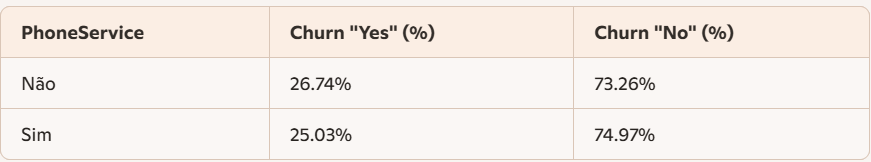


Isso indica que:
A taxa de Churn é um pouco maior entre quem não tem PhoneService, com difetença de 1.7 ponto percentual. Taxa modesta, mas pode ser relevante.

----
### Decisões:

- Vou manter a variável, pois mesmo isoladamente ela não seja forte, porém pode interagir com outras variáveis (como tipo contrato, uso de internet, etc) e ajudar o modelo capturar padrões mais complexos.

- Vou tratar os nulos com uma categoraia separada("Sem PhoneService") , já que representam mais das metades dos dados.

- Criar uma variável binária auxiliar (PhoneService_nulo), para reforçar o sinal de ausência.



Criando  essa variável binária ( (PhoneService_nulo),) para ajudar o modelo  a capturar  o sinal da ausência de dados, especialmente se os nulos estão correlacionados com o Churn.

In [200]:
# Cria a variável binária: 1 se PhoneService está nulo , 0 se não estiver.
df['PhoneService_nulo'] = df['PhoneService'].isnull().astype(int)

#Média do  Pagamento_Mensal - Análise da distribuição dos dados
###A porcentagem de dados faltantes não é tão alta (13% é gerenciável).

A distribuição dos dados não é muito distorcida (ou seja, sem muitos outliers).

A variável é contínua e quantitativa, como é o caso aqui.

In [201]:
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

### Mediana do Pagamento_Mensal - Análise da Distribuição dos dados.

In [202]:
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Pagamento_Mensal'].median()

71.45

##Comparação entre Média e Mediana.
A média é menor  5.84 em elação à Mediana. Sugere que há valores muito baixos (outliers negativos) que puxam a média para baixo.
Resumindo: Há clientes pagando valores bem baixos que estão distorcendo a média.

Implicações práticas:

Se você usar a média para imputar valores faltantes, pode acabar subestimando o pagamento típico dos clientes.

Conclusão:
A mediana representa melhor o "centro" da distribuição nesse caso, pois não é afetada por outliers.

Para imputar os valores ausentes de Pagamento_Mensal, a mediana é mais segura e mais representativa da maioria dos clientes, então optei por prrencher os valores faltates com a mediana

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

## Distribuição de dados da Coluna Pagamento_Mensal

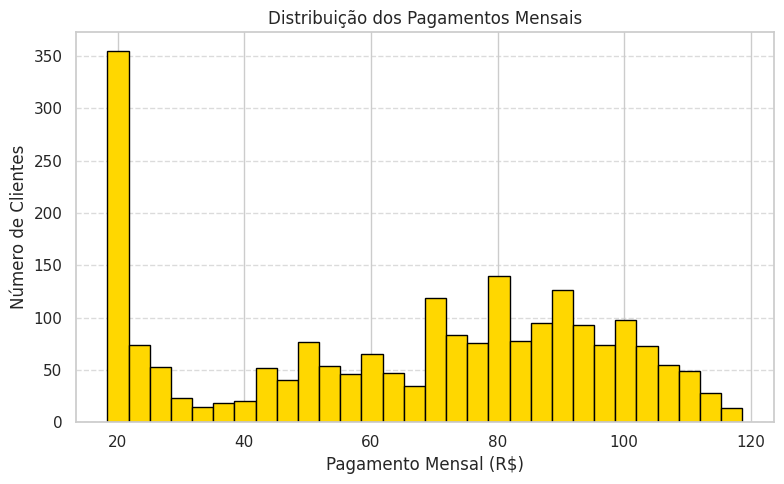

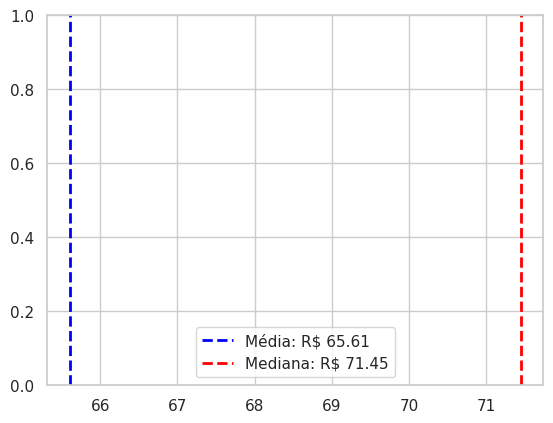

In [204]:

import matplotlib.pyplot as plt

#Histograma da distribuição dos pagamentos mensais
plt.figure(figsize=(8,5))
plt.hist(df['Pagamento_Mensal'], bins=30, color='gold', edgecolor='black')

#Títulos e rótulos
plt.title('Distribuição dos Pagamentos Mensais')
plt.xlabel('Pagamento Mensal (R$)')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Adicionar a Média e a  Mediana como linhas verticais no gráfico

#Média e Mediana

media = df['Pagamento_Mensal'].mean()
mediana = df['Pagamento_Mensal'].median()

#Adicionando linhas ao histograma
plt.axvline(media, color='blue', linestyle='dashed', linewidth=2, label=f'Média: R$ {media:.2f}')
plt.axvline(mediana, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: R$ {mediana:.2f}')
plt.legend()

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.


##Aplicação da mediana em pagamento mensal e preenchimento dos dados faltantes.

In [205]:
# Calcula a mediana da coluna 'Pagamento_Mensal'
median_pagamento_mensal = df['Pagamento_Mensal'].median()

# Preenche os valores faltantes com a mediana
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(median_pagamento_mensal)

# Verifica se ainda existem valores faltantes na coluna 'Pagamento_Mensal'
print(df['Pagamento_Mensal'].isnull().sum())

0


###Justificativa  da substituição dos dados nulos pela mediana:
**Preservação da estrutura dos dados**

Sbstituir os valores nulos pela mediana , mantém a coerência estatística, sem distorcer a variabilidade natural dos dados.

A mediana é mais robusta em distribuições assimétricas, evitando que valores extremos influenciem na imputação, inclusive  robustez contra os outliers.

Se tiver alguns clientes que pagam  valores a mais ou  a menos que a maioria, a média será puxada - mas a mediana permanece estável.

A mediana representa melhor o "centro" real da amostra.

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

### 3.1 -  Renomeando  colunas com nomes sem a separação de  _ (underline) , vindo a padronizar todos os nomes. Renomear letras minúsculas iniciais, Renomear nomes com  ç



In [206]:
df.rename(columns={
    'customerID': 'Customer_ID',
    'PhoneService': 'Phone_Service',
    'StreamingTV': 'Streaming_TV',
    'PaymentMethod': 'Payment_Method',
    'Serviço_Telefone' : 'Servico_Telefone',
    'Servico_Seguranca': 'Servico_Seguranca',
    'Suporte_Tecnico': 'Suporte_Tecnico'
}, inplace=True)

In [207]:
print(df.columns)


Index(['Customer_ID', 'Genero', 'Idoso', 'Casado', 'Dependents',
       'Tempo_como_Cliente', 'Phone_Service', 'Servico_Internet',
       'Servico_Seguranca', 'Suporte_Tecnico', 'Streaming_TV', 'Tipo_Contrato',
       'Payment_Method', 'Pagamento_Mensal', 'Total_Pago', 'Churn',
       'PhoneService_nulo'],
      dtype='object')


In [208]:
#Mostra meu DataFrame com as colunas já renomeadas
df.head()


,Customer_ID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,Phone_Service,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Payment_Method,Pagamento_Mensal,Total_Pago,Churn,PhoneService_nulo
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No,0
4,9237-HQITU,NaN,0,No,No,2,Yes,FIBER OPTIC,No,No,No,Month-to-month,Electronic check,71.45,151.65,Yes,0


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [209]:
#Renomar colunas  em inglês para  lingua portuguêsa (BR) :
# Customer_ID	,	Dependents,	Phone_Service, Streaming_TV, Payment_Method, 	Churn

df.rename(columns={
    'Customer_ID': 'ID_Cliente',
    'Dependents': 'Dependentes',
    'Phone_Service': 'Servico_Telefone',
    'Streaming_TV': 'Plataformas_TV',
    'Payment_Method': 'Metodo_Pagamento',
    'Churn': 'Cancelamento'
}, inplace=True)


In [210]:
# Mostrar as colunas
print(df.columns)


Index(['ID_Cliente', 'Genero', 'Idoso', 'Casado', 'Dependentes',
       'Tempo_como_Cliente', 'Servico_Telefone', 'Servico_Internet',
       'Servico_Seguranca', 'Suporte_Tecnico', 'Plataformas_TV',
       'Tipo_Contrato', 'Metodo_Pagamento', 'Pagamento_Mensal', 'Total_Pago',
       'Cancelamento', 'PhoneService_nulo'],
      dtype='object')


In [211]:
#Mostra meu DataFrame com as colunas já renomeadas
df.head()


,ID_Cliente,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Plataformas_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Cancelamento,PhoneService_nulo
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No,0
4,9237-HQITU,NaN,0,No,No,2,Yes,FIBER OPTIC,No,No,No,Month-to-month,Electronic check,71.45,151.65,Yes,0


## [EXTRA] 5 - Verificar se clientes com mais serviços estão mais fidelizados.

Serviços contratados.; Serviço_ internet Serviço_Segurança, Suporte_Tecnico ou Plataformas_TV , se tem menor churn.


# ETAPAS PARA ESSA ANÁLISE:  
1 - Criar uma variável de “quantidade de serviços”
Somar as colunas binárias(Yes/No) dos serviços para cada cliente.



In [212]:
import pandas as pd
df['Qtd_Servicos'] = (
    (df['Servico_Internet'] == 'Yes').astype(int) +
    (df['Servico_Seguranca'] == 'Yes').astype(int) +
    (df['Suporte_Tecnico'] == 'Yes').astype(int)
)

2. Analisar churn por número de serviços
Agrupar por Qtd_Servicos e calcular a taxa de cancelamento:
Isso vai mostrar, por exemplo, se clientes com 3 ou 4 serviços têm menor proporção de Cancelamento = Yes.


In [213]:
# Analisar o Churn por nuimero de serviços
churn_por_servico = df.groupby('Qtd_Servicos')['Cancelamento'].value_counts(normalize=True).unstack()

3 - Análise individual de cada serviço.
Você pode fazer uma tabela cruzada para cada serviço.

Isso revela se a presença de cada serviço individualmente está associada à menor churn.


In [214]:
# Análise individual de cada serviço.
pd.crosstab(df['Servico_Telefone'], df['Cancelamento'], normalize='index')
pd.crosstab(df['Servico_Internet'], df['Cancelamento'], normalize='index')
pd.crosstab(df['Servico_Seguranca'], df['Cancelamento'], normalize='index')
pd.crosstab(df['Suporte_Tecnico'], df['Cancelamento'], normalize='index')
pd.crosstab(df['Plataformas_TV'], df['Cancelamento'], normalize='index')

Cancelamento,No,Yes
Plataformas_TV,,
No,0.668993,0.331007
No internet service,0.939394,0.060606
Yes,0.704357,0.295643


4. Visualização
Um gráfico de barras pode ilustrar bem a relação entre número de serviços e taxa de cancelamento:


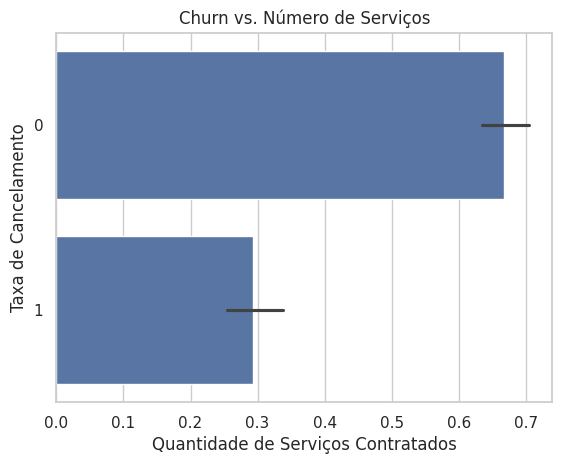

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Mapeando 'Yes' para 1 e "No" para 0 na coluna Churn (Cancelamento)
df['Cancelamento_Numerico'] = df['Cancelamento'].map({'Yes': 1, 'No': 0})


sns.barplot(x='Qtd_Servicos', y='Cancelamento_Numerico', data=df, estimator=np.mean)

plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Quantidade de Serviços Contratados')
plt.title('Churn vs. Número de Serviços')
plt.show()

# OPcional: remover e coluna tenporária se não for mais necressária
# df = df.drop('Cancelamento_Numerico', axis=1)

Insight esperado:

Se a hipótese se confirmar, você verá que quanto mais serviços o cliente contrata, menor a chance de cancelamento. Isso pode embasar estratégias de upsell e pacotes combinados para aumentar a retenção.